# GA 2.3: Beam Beats

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px"\>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px"\>
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): week 2.3. Due: Friday, November 29, 2024.*

## Analyzing cantilever-beam accelerations and global Mean Sea-Level measurements

This project covers the week on Signal Processing (week 2.3).

As a warming up you will create and analyze some elementary signals yourself, and next, you will carry out frequency domain analyses on two given data-sets, namely acceleration measurements of a Cantilever-Beam experiment, and (in optional Task 10) Global Mean Sea-Level measurements.

Most of the Tasks in this notebook consist of both coding, producing a plot, and answering (open) questions. Typically, as you work your way through the Tasks, you can often re-use code, or part of it, from earlier Tasks and assignments. That will save you a lot of work!!

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>In many of the code blocks below, template code to create figures is provided. Note that there is a lot of code missing, and one line of <code>YOUR_CODE_HERE</code> does not imply that only one line of code is missing!</p></div>

### Data Acquisition System

A data acquisition (DAQ) system usually consists of four components:

<img src="https://gitlab.com/JelleKnibbe/public-files/-/raw/main/SP_Practical/DAQ.png" style="margin:auto"/>


- A sensor transforms a physical signal into a small voltage. The transformation is often frequency dependent or nonlinear, and can show drift or bias.
- Signal conditioning electronics (often included in the sensor housing) filter unwanted frequencies, such as the 50 Hz line frequency caused by power plant generators, using low-pass or notch filters. In addition the sensor voltage may be amplified.
- An analog-to-digital (A/D) converter samples the analog voltage with a certain rate, such as 100 Hz. The A/D converter can measure analog voltages within a certain range, the measurement range. The measured voltage is quantized with a certain resolution, such as 14-bit, which means that the full measurement range is divided into $2^{14}=16,384$ discrete intervals. Together, the resolution and measurement range determine the precision. Usually the sample rate, the measurement range, and the sample resolution are configurable. Sampling and quantizing together turns an analog signal into a digital signal.
- A digital computer reads the sampled data from the A/D converter at specific times, and allows for further processing, analysis and storage of the (digital) signal.

The result is that an analog, physical signal, is turned into a series of numbers (samples of the signal, in the time domain), ready for processing and analysis in a digital computer.

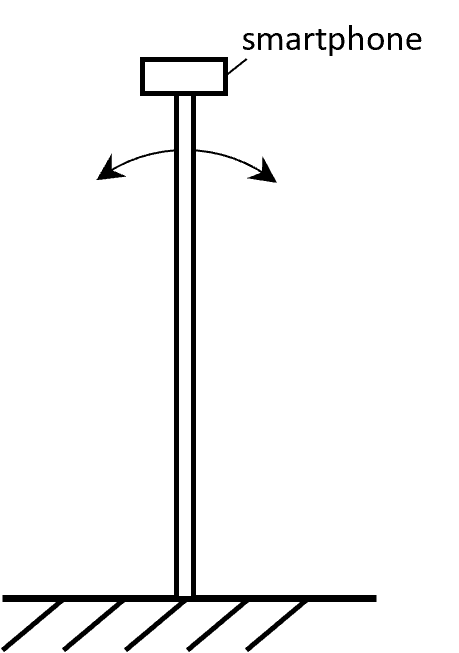

One of the data sets that you will analyze during this MUDE Q2 project was acquired by an accelerometer in a smartphone, on top of a vertical cantilever-beam. The accelerometer measures the side-ward accelerations, expressed in m/s<sup>2</sup>, and sampled at 50 Hz. Detailed information about the experiment and the sensor can be found in "Experimental evaluation of smartphone accelerometer and low-cost dual frequency GNSS sensors for deformation monitoring", by Alexandru Lapadat, Christian Tiberius and Peter Teunissen, Sensors 2021, 21, 7946, https://doi.org/10.3390/s21237946.

A quick impression of the test setup can be gained by watching the short video [Cantilever Beam Experiment](https://youtu.be/o4moRwvlBLU?si=aKelBMWm3HB2Of26) (1 minute).

A theoretical description of the motion of the smartphone accelerometer fixed to the cantilever beam is presented in Appendix A. Pulling the beam at the tip and releasing it, results in a (nearly) horizontal side-ward motion of the smartphone, and the (horizontal) position can be described by a *damped harmonic* as a function of time. Consequently, also the first and second derivative with respect to time, the velocity and acceleration as a function of time as the smartphone will measure it, are harmonics.

### Basic sinusoid signal

You will start with first creating (and analyzing) a few simple signals yourself. In the first few Tasks of this project, we will take the damping ratio zero and use a fairly short measurement time (duration), and hence the acceleration measured by the smartphone is a plain (undamped) sinusoid as shown in Appendix A (a stationary signal). In the following Tasks we also add a phase offset $\varphi$ to the plain sinusoid:

$$
x(t) = A \sin(2 \pi f_c t + \varphi)
$$

The result is taken from the last equation in Appendix A. We consider here acceleration, though for convenience, we omit the dots on top of the $x(t)$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 1:</b>

- Create a time-array starting at $t=0$ s, ending at $t=5.0$ s, with a sampling rate of 100 Hz. Hint: what is the number of samples $N$? And what should then be the last value in the time-array? Note that, for example, with $N=10$ samples at a sampling rate of $f_s = 100$ Hz, we have signal samples at times $t=0.00, 0.01, 0.02, ... , 0.08, 0.09$ seconds, hence $T_{meas}= N \Delta t =0.1$ seconds (the sample-and-hold convention).
- Create a sinusoidal signal $x(t) = A \sin(2 \pi f_c t + \varphi)$, with amplitude $A=1.0$ Volt, carrier frequency $f_c=1.0$ Hz, and initial phase $\varphi = 5$ degrees, to be converted into radians.
- Make a plot of the signal against time. Note that this is strictly a *sampled signal* $x_n$ rather than $x(t)$, but since we use a rather high sampling rate, the signal shown is close to continuous in time. Connecting the sample points of $x_n$ in the graph by lines, as done in the graph below, corroborates the suggestion of a continuous-time signal. Be aware!
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>We will give you the answers in this code cell for free!</p></div>

In [ ]:
T_meas = 5
f_s = 100 #sampling rate [Hz]

t_vec = np.arange(0, T_meas, 1 / f_s) # ends at 4.99, length 500 according to the sample-and-hold convention

A = 1 
f_c = 1 
phi = 5 * np.pi / 180
x = A * np.sin(2 * np.pi * f_c * t_vec + phi)

plt.plot(t_vec, x, color='b', label='signal')
plt.xlabel(r'$t \: [s]$')
plt.ylabel(r'$x(t) \: [V]$')
plt.legend(loc='upper right')
plt.title(fr'Sinusoidal signal with $A$={A} V, $f_c$={f_c} Hz and initial phase $\phi$={phi:.3f} °')
plt.grid()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>
   
The number of samples is $N=\frac{T_{meas}}{\Delta t}=T_{meas}\cdot f_s=5\cdot 100=500$.
The last value should be $4.99$ because we use a $\Delta t=\frac{1}{f_s}=0.01$ s.
</p>
</div>

### The Discrete Fourier Transform (chapter 5)

To discover which frequencies are contained in the signal $x(t)$, we can transform it from the time domain to the frequency domain using the Fourier transform:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi f t} dt
$$

Which can then be expressed in terms of magnitude and phase:

$$
X(f) = |X(f)|e^{j\theta(f)}
$$

Where $|X(f)|$ plotted against frequency $f$ is called the *magnitude spectrum* (and practically often referred to as amplitude spectrum).

The set and number of sinusoids required to approximate or re-create a given signal $x(t)$ depends on the shape of that signal. Of course, when the signal is a pure sinusoid, we only need one term. For an example, consider a 2 Hz sinusoidal signal and its magnitude spectrum below (the magnitude spectrum is expressed in [Vs], which equals [V/Hz], hence a magnitude or amplitude density).

<img src="https://gitlab.com/JelleKnibbe/public-files/-/raw/main/SP_Practical/SignalSpectrumExample.png" style="margin:auto" width=800/>

You can see a sharp spike in the magnitude plot (which has two logarithmic axes, and we only plot the spectrum for positive frequencies $f>0$). A continuous time sinusoid with amplitude $A$ will produce a magnitude of $\frac{A T_{meas}}{2}$ in the amplitude spectrum (with $T_{meas}$ the *measurement time* or duration), rather than $\frac{A}{2}$ which you would expect (in a double-sided spectrum). This is because of the limited time duration of the input signal, which actually implies multiplication of $x(t)$ by a *rectangular time window* $w(t)=\Pi(\frac{t}{T_{meas}})$. Since the sinusoid has an amplitude of $A=1$ V, and was measured for $T_{meas}=5$ seconds, the magnitude becomes 2.5. The magnitude at all other frequencies is very small, approximately $10^{-15}$, or approximately zero.

The Fourier transform is a continuous-time operation, mapping the continuous time-domain to the continuous frequency domain. Usually, we don't have continuous-time signals, but discrete time signals $x_n$ sampled at a certain sampling rate. The discrete Fourier Transform (DFT) is the discrete-time equivalent of the continuous time-Fourier transform:

$$
X_k = \sum_{n=0}^{N-1}x_ne^{-j2\pi kn/N}, k=0,1,...,N-1
$$

Where $X_k$ is the sequence of frequency domain samples. NumPy contains a function to perform the DFT using a fast numerical algorithm, the Fast Fourier Transform:

<code>X_discr = np.fft.fft(x)</code>

For more information on the function see [here](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html).

The discrete-time signal $x_n$ and the frequency domain samples $X_k$ returned by Python are of equal length ($N$ samples in, $N$ samples out). When you compare the equations of the DFT with the continuous Fourier Transform, you will see that in the continuous equation we integrate over time $t$, while in the DFT *no information* about the time or sample rate is required (there is no $\Delta t$ in the above equation for $X_k$, as noted at the end of Chapter 5). This results in a *scale factor* in the spectrum when the DFT of signals with different sample rates are compared. To solve this, we have to multiply the DFT as calculated by NumPy by the sample time interval $\Delta t = 1/f_s$ to restore the time dimension and obtain a *discrete approximation of the continuous Fourier Transform*. To account for the measurement duration as described above, we have to divide by $T_{meas} = N \Delta t$. So, in total, multiply by $\Delta t$ and divide by $T_{meas}$, hence, we have to divide the NumPy result by the number of samples $N$:

<code>X_cont = np.fft.fft(x) / N</code>

The DFT only contains information (the complex value of $X_k$) at discrete frequencies, known as the *analysis frequencies*, which are integer multiples of the frequency resolution $f_0$. If we have a sampled signal $x_n$ consisting of $N$ samples, sampled at $f_s$ Hz with $f_s=1/ \Delta t$, the frequency resolution is:

$$
f_0 = \frac{1}{T_{meas}} = \frac{1}{N \Delta t} = \frac{f_s}{N}
$$

The first value of the complex vector $X_n$ returned by NumPy is the mean of the time-domain signal corresponding to $f=0$ Hz. So, the frequency vector corresponding to the discrete Fourier transform starts at zero and has $N$ elements, the analysis frequencies:

<code>f_vec = np.arange(0, f_s, f_0)</code>

With task 2 you visualize the entire output as you get it from the `np.fft.fft`, hence for frequencies $[0,f_s)$. From Chapter 4 you know that the spectrum of a sampled signal repeats every integer multiple of $f_s$ (copies of the spectrum).

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 2:</b>   

- Calculate the Fast Fourier Transform of the signal you generated in Task 1. Remember: the signal has 500 samples and thus does *not* end at exactly 5 second.
- Create the frequency vector $f$ with the analysis frequencies.
- Plot the modulus of the Fourier Transform against the frequency $f$ using a log scale on both axes. Use plot markers to see at which frequencies the Fourier transform was calculated.

On top of that, answer to the following questions:
<ol>
    <li>Describe the amplitude spectrum.</li>
    <li>What is the magnitude of $X(f)$ at $f$ = 1 Hz?</li>
    <li>Do you notice anything peculiar about the amplitude spectrum?</li>
</ol>
</p>
</div>

In [ ]:
## SOLUTION

T_meas = 5
f_s = 100

t_vec = np.arange(0, T_meas, 1/f_s) # ends at 4.99, length 500 according to the sample-and-hold convention

A = 1
f_c = 1
phi = 5 * np.pi / 180
x = A * np.sin(2 * np.pi * f_c * t_vec + phi)

N = len(x)
X_cont = np.fft.fft(x) / N

f_0 = f_s / N
f_vec = np.arange(0, f_s, f_0)

f, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transform')
axes[0].loglog()
axes[0].set_xlabel(r'$f \: \: [Hz]$')
axes[0].set_ylabel(r'$|X(f)| \: [V]$')
axes[0].grid()
axes[0].set_title('Log/Log')

axes[1].plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transform')
axes[1].set_xlabel(r'$f \: \: [Hz]$')
axes[1].set_ylabel(r'$|X(f)| \: [V]$')
axes[1].grid()
axes[1].set_title('Linear')
plt.legend()

print(f_vec[np.abs(X_cont)>0.1])

**In addition to the code output above, write your answer in this Markdown cell.** 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ol>
    <li>A peak of 0.5 should be found (from theory) at a frequency of 1 Hz and one around 100 Hz (exactly at 99 Hz), the rest all close to zero.</li>
    <li>0.5 (as we divide the fft-result by N to get the equivalent of the continuous-time Fourier transform).</li>
    <li>The peak at 100 Hz (or 99 Hz to be precise) should not be there. We did not input a signal with such a frequency.</li>
</ol>
</p>
</div>

### Symmetry


Due to symmetry properties of the DFT, the following holds for a real signal $x(t)$:

$$
|X_k| = |X_{-k}|
$$

Which means that the modulus of the Fourier coefficients is symmetric about $f=0$. The NumPy <code>fft</code> command appends the Fourier coefficients for $k<0$ to the right side of the Fourier coefficients for $k \ge 0$. This is called the *two-sided* spectrum.

Since we are working with real signals, the symmetry property is valid, and we can just ignore the coefficients for $k<0$. This means that we consider the following range in the frequency domain:

$[0, \frac{f_s}{2}]$ for even values of $N$

$[0, \frac{f_s}{2})$ for odd values of $N$

In other words, we are only considering frequencies up to half of $f_s$. This is easily implemented in Python using the floor division operator <code>//</code>:

<code>X_cont = X_cont[:N//2]</code>
\
<code>f_vec = f_vec[:N//2]</code>

If you're unfamiliar with this, consider that <code>A//B</code> returns the number of times <code>B</code> 'fits into' <code>A</code>. In principle, this will always return an integer, so it can be easily used for indexing an array. In this specifc example, <code>N//2</code> will return $\frac{N}{2}$ for even $N$ and $\frac{N-1}{2}$ for odd N, which is exactly what we want. See the example below.

In [ ]:
N = 100
print(f'{N} floor divided by 2: {N//2}')
print(f'{N+1} floor divided by 2: {(N+1)//2}')
print(f'{N-1} floor divided by 2: {(N-1)//2}')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">

<p>
<b>Task 3:</b>   

- Repeat Task 2 with different measurement times $T_{meas}$ for the signal. Use measurement times such that the $f_c$ = 1 Hz oscillation fits *exactly* 1 time, 5 times and 20 times.
- Plot the amplitude spectrum for all three measurement times, **only for positive frequencies**, in separate graphs (log-log scale) with the same domains and answer to the following questions:

- What is the effect of changing $T_{meas}$ on the frequency range in the amplitude spectrum? Does the highest analysis frequency change?
- Does the frequency resolution change?
- Does the magnitude of at the peaks change?

</p>
</div>

In [ ]:
### SOLUTION
T_lst = [1, 5, 20]
f_s = 100

plt.figure(figsize=(12,4))
for i, T_meas in enumerate(T_lst):
    t_vec = np.arange(0, T_meas, 1/f_s)
    A = 1
    f_c = 1
    phi = 5 * np.pi / 180
    x = A * np.sin(2 * np.pi * f_c * t_vec + phi)
    
    N = len(x)
    X_cont = np.fft.fft(x) / N
    
    f_0 = f_s / N
    f_vec = np.arange(0, f_s, f_0)
    
    X_cont = X_cont[:N//2]
    f_vec = f_vec[:N//2]

    plt.subplot(1, 3, i+1)
    plt.plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transform')
    plt.loglog()
    plt.xlim(0.04, 100)
    plt.ylim(10**(-19), 10)
    plt.xlabel(r'$f \: \: [Hz]$')
    plt.ylabel(r'$|X(f)| \: [V]$')
    plt.grid()
    plt.tight_layout()
plt.legend();

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ol>
    <li>No, the highest analysis frequency stays the same (as it is related to the sampling frequency, which we did not change).</li>
    <li>Yes, the frequency resolution becomes better/finer (gets smaller).</li>
    <li>No, because we already divide by (we already account for the measurement duration).</li>
</ol>
</p>
</div>

### Aliasing (chapter 4)

So far we have been analyzing a signal with a fairly low frequency, just $1$ or $2$ Hz. Now suppose, due to some unexpected source, our signal contains a second sinusoid with a much higher frequency. This is often caused by the line frequency ($50$ Hz) due to power plant generators providing the $220$ V current in regular buildings, or by electrical interference. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">

<p>
<b>Task 4: with this task we'll make you run into an aliasing problem . . .</b>  

- Create a time-array starting $t=0$, with a sampling rate of 100 Hz, and ending such that a sinusoid with a frequency of 1 Hz fits exactly 5 times in the measurement time.

- Re-create the signal $x(t) = A \sin(2 \pi f_c t + \varphi)$ from the first Task, with amplitude $A=1.0$ V, carrier frequency $f_c=1.0$ Hz, and initial phase $\varphi = 5$ degrees, to be converted into radians.

- Add to this signal a second sinusoid with a frequency of $80$ Hz and amplitude of $0.1$ V (and zero initial phase).

- Create a plot of the signal against time, and of the amplitude spectrum as in the previous Tasks. 

Then answer to the following questions:
<ol>
    <li>What do you see in the frequency plot? Are there peaks? How many? Where?</li>
    <li>Does this match what you see in the time plot?</li>
    <li>Does changing the measurement time (duration) help?</li>
</ol>
</p>
</div>

In [ ]:
### SOLUTION
T_meas = 5
f_s = 100

t_vec = np.arange(0, T_meas, 1/f_s) # ends at 4.99, length 500

A = 1
f_c = 1
phi = 5 * np.pi / 180
x = A * np.sin(2 * np.pi * f_c * t_vec + phi)

A_i = 0.1
f_i = 80
x += A_i * np.sin(2 * np.pi * f_i * t_vec)

N = len(x)
X_cont = np.fft.fft(x) / N

f_0 = f_s / N
f_vec = np.arange(0, f_s, f_0)

X_cont = X_cont[:N//2]
f_vec = f_vec[:N//2]

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(t_vec, x, color='b', label='signal')
plt.xlabel(r"$t \: [s]$")
plt.ylabel(r"$x(t) \: [V]$")
plt.grid()
plt.title('Time signal')
plt.legend()

plt.subplot(212)
plt.plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transform')
plt.loglog()
plt.xlim(0.04, 100)
plt.ylim(10**(-19), 10)
plt.xlabel(r"$f \: \: [Hz]$")
plt.ylabel(r"$|X(f)| \: [V]$")
plt.grid()
plt.tight_layout()
plt.title('Amplitude spectrum')
plt.legend();

**In addition to the code output above, write your answer in this Markdown cell.** 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ol>
    <li>There are two peaks, one of $0.5$ at $1$ Hz and one of $0.05$ at $20$ Hz, which should be at $80$ Hz (again exact values are hard to read but should be derived from theory).</li>
    <li>Yes, there is a large amplitude sinusoid with a frequency of $1$ Hz, and a small amplitude sinusoid with a frequency of $20$ Hz on top if it (count the number of wiggles - there are $20$ wavies within 1 second). However, it does not match the input signal we created (with $1$ Hz and $80$ Hz).</li>
    <li>No, the frequency resolution would change, but not the largest frequency of the amplitude spectrum, as that one is determined by the sampling frequency $f_s$.</li>
</ol>
</p>
</div>

The effect seen in Task 4 is called *aliasing*, and the cause is that if your sample rate is too low for the signals you're measuring, you will not capture their oscillation period sufficiently - with at least two samples per cycle. Instead, the signal will appear at a much lower frequency, as you can see in the figure below. Here $f_c = 5$ Hz, and the signal was sampled with $f_c = 7$ Hz, and based on the discrete time samples we incorrectly conclude that there is a frequency component at $2$ Hz (at the end of Chapter 4).

<img src="https://gitlab.com/JelleKnibbe/public-files/-/raw/main/SP_Practical/NewSlide38.png" style="margin:auto" width=800/>
<img src="https://gitlab.com/JelleKnibbe/public-files/-/raw/main/SP_Practical/NewSlide51.png" style="margin:auto" width=800/>

So, how fast do we need to sample to capture an $80$ Hz signal?

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 5:</b>   

Repeat Task 4 with different sample rates: $110, 150, 160,$ and $200$ Hz. Plot the signal and amplitude spectrum for each one (you might want to use a loop). 

Then answer the following questions:
<ol>
    <li>At what frequency does the (aliased) 80 Hz signal appear in the spectrum, for the above values of $f_s$ (provide numerical answers)?</li>
    <li>Can you figure out the relationship (a simple equation) between the sample rate and the frequency of the original signal, and the frequency at which the alias appears?</li>
</ol>
</p>
</div>

In [ ]:
### SOLUTION

f_s_lst = [110, 150, 160, 200]

for f_s in f_s_lst:
    T_meas = 5
    # f_s = 100
    
    t_vec = np.arange(0, T_meas, 1/f_s)
    
    A = 1
    f_c = 1
    phi = 5 * np.pi / 180
    x = A * np.sin(2 * np.pi * f_c * t_vec + phi)
    
    A_i = 0.1
    f_i = 80
    x += A_i * np.sin(2 * np.pi * f_i * t_vec)
    
    N = len(x)
    X_cont = np.fft.fft(x) / N
    
    f_0 = f_s / N
    f_vec = np.arange(0, f_s, f_0)
    
    X_cont = X_cont[:N//2]
    f_vec = f_vec[:N//2]
    
    plt.figure(figsize=(12,6))
    plt.suptitle(f'$f_s = {f_s}$ Hz')
    plt.subplot(211)
    plt.plot(t_vec, x, color='b', label='signal')
    plt.xlabel(r'$t \: [s]$')
    plt.ylabel(r'$x(t) \: [V] $')
    plt.grid()
    plt.legend()
    plt.subplot(212)
    plt.plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transform')
    plt.loglog()
    plt.xlim(0.04, 100)
    plt.ylim(10**(- 19), 10)
    plt.xlabel(r'$f \: \: [Hz]$')
    plt.ylabel(r'$|X(f)| \: [V]$')
    plt.grid()
    plt.tight_layout()
    plt.legend()

**In addition to the code output above, write your answer in this Markdown cell.** 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ul>
    <li> Different frequencies:
    <ul>
       <li>$f_s=110$ Hz: peak at $30$ Hz.
       <li>$f_s=150$ Hz: peak at $70$ Hz.
       <li>$f_s=160$ Hz: no peak (the $80$ Hz signal is sampled exactly twice per cycle, exactly at the 'zero-passes'; we now don't see it at all).
       <li>$f_s=200$ Hz: peak at $80$ Hz.
    </ul>
</li>
    <li>The sample rate needs to be more than twice the (highest) frequency of the signal, which is the *Nyquist* rate. As long as we do not meet this requirement the alias appears mirrored about the Nyquist frequency (which is half the sampling frequency), e.g. with $f_s=110$ Hz, the alias of $f_i=80$ Hz appears at $110-80=30$ Hz.</li>
</ol>  
</p>
</div>

As you probably figured out, the sample rate needs to be faster than twice the largest frequency in the signal. In other words, you can measure signals with a frequency up to half the sample rate without aliasing becoming a problem. The frequency above which aliasing occurs (half the sampling rate) is called the *Nyquist frequency* (Chapter 4).

### Damped vibrations

We now know how to create an amplitude/magnitude spectrum. We've seen that we get aliasing if our signal has components at frequencies higher than the *Nyquist frequency* (and leakage if the measurement time is too short). Now, let's consider the damped vibration aceleration signal that an accelerometer would measure (see *Appendix A*). In this case the damping ratio is not equal to zero, unlike in Tasks 1 to 5.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 6:</b>   

- Create a time-array starting at $t=0$ s, ending at $t = 50$ s, with a sampling rate of $100$ Hz.
- Create a damped harmonic acceleration signal $x(t) = \frac{x(0)}{\sqrt{1-\zeta^2}} e^{-\zeta \omega_0 t} \sin(\omega_d t)$ with $\zeta = 0.05$, $\omega_0 = 10 \pi$ rad/s (corresponding to $5$ Hz), $\omega_d = \omega_0 \sqrt{1-\zeta^2} = 9.987 \pi$ rad/s, and initial displacement $x(0)=1$ (for convenience the initial phase of the signal is kept to zero).
- Create a plot of the signal against time, and of the amplitude spectrum as in the previous Tasks.

Then answer the following questions:
<ol>
    <li>Do you see any changes in the time plot, compared to the earlier plot? Describe them!</li>
    <li>What is the dominant frequency of the signal now?</li>
</ol>
</p>
</div>

In [ ]:
### SOLUTION
T_meas = 50
f_s = 100

t_vec = np.arange(0, T_meas, 1/f_s)

x_0 = 1
zeta = 0.05
omega_0 = 10 * np.pi
omega_d = omega_0 * np.sqrt(1 - zeta**2)
x = x_0 / (np.sqrt(1 - zeta**2)) * np.exp(-zeta * omega_0 * t_vec) * np.sin(omega_d * t_vec)

N = len(x)
X_cont = np.fft.fft(x) / N

f_0 = f_s / N
f_vec = np.arange(0, f_s, f_0)

X_cont = X_cont[:N//2]
f_vec = f_vec[:N//2]

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(t_vec, x, color='b', label='signal')
plt.xlabel(r"$t \: [s]$")
plt.ylabel(r"$x(t) \: [V] $")
plt.title('Time signal')
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(f_vec, np.abs(X_cont), 'x', color='b', label='Fourier transfrom')
plt.loglog()
plt.xlim(0.04, 100)
plt.ylim(10**(-7), 10)
plt.xlabel(r"$f \: \: [Hz]$")
plt.ylabel(r"$|X(f)| \: [V]$")
plt.title('Amplitude spectrum')
plt.grid()
plt.tight_layout()
plt.legend()

print(f_vec[np.argmax(np.abs(X_cont))])

**In addition to the code output above, write your answer in this Markdown cell.** 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ol>
    <li>The signal is now clearly a sinusoid with an exponentially decaying amplitude, a.k.a. a damped vibration!</li>
    <li>Around $5$ Hz (max value of $|X_{cont}|$ at $4.98$ Hz).</li>
</ol>
Instead of a 'crisp' spectrum, with a very clear, distinct and ultimately narrow peak, you now get a kind of smoothed or faded peak. This is simply the result of dealing with a damped harmonic, rather than a perfect harmonic. The signal somehow still looks pretty periodic, but strictly spoken, the signal is not periodic anymore, as the amplitude slightly changes (decreases) with time.
</p>
</div>

### Cantilever-beam acceleration measurements

Now you're ready to start analyzing the cantilever-beam acceleration measurements.

Read in the data-file: *cantileverbeam_acc50Hz.csv*.

This dataset contains 5 minutes of measurements with a sampling rate of $50$ Hz (a total of $N=15001$ samples). The first column in the file contains the UTC time of day (in seconds), the second column contains the measured acceleration (in m/s<sup>2</sup>).

### Detrending

In this project the signal of interest is the damped, harmonic motion of the cantilever-beam. In addition the measurements may contain (unwanted) effects of the sensor (think of an offset, due to imperfect manufacturing and/or prior calibration, or a drift over time, for instance due to temperature changes in the electronics during the experiment). By detrending we mean to remove such effects, prior to our spectral analysis, so that we can start with a nice, zero mean signal. A-priori detrending is good practice and generally yields a cleaner spectrum. Next week (week 2.4 on Time Series Analysis) we cover the subject of removing unwanted effects from the signal in more detail, as to obtain a so-called **stationary** signal, meaning that the properties or characteristics of the signal (such as the mean) do not change over time, and, we provide practical means to “stationarize” a given or measured signal.

There are built-in functions in Python to remove such an offset and/or trend (and you're free to use them). But, earlier in the MUDE, in week 1.3, you learned about least-squares parameter estimation, and that's what you can apply to do the detrending (and actually built-in functions just apply the very same principle). Next week, on Time Series Analysis, you will actually be covering (again) the estimation of a trend in a time series of measurements.
As a re-cap for week 1.3: when a series of observations $y_1, …, y_m$ (in our case with $m=N$) is supposed or expected to exhibit a functional linear trend (a straight line in terms of a graph), this can be modelled as

$$
\mathbb{E} = \begin{pmatrix} \begin{bmatrix} Y_{1} \\ Y_{2} \\ \vdots \\ Y_{m} \end{bmatrix} \end{pmatrix} 
         = 
         \begin{bmatrix} 1 & t_1 - t_1 \\ 1 & t_2 - t_1 \\ \vdots & \vdots \\ 1 & t_m - t_1 \end{bmatrix} 
         \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix}
$$

with $x_1$ the offset at time $t_1$ (rather than $t=0$), and $x_2$ the slope of the line. The two unknown parameters in this vector $x$ can be estimated through (unweighted) least-squares, $\hat{x}=(A^T A)^{-1} A^T y$, and next the residuals are obtained as $\hat{\epsilon}=y-\hat{y}=y-A\hat{x}$. The residuals are the 'left-over part' of the observations, once the (estimated) trend has been taken out; these residuals are of interest for further spectral analysis!

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 7:</b>   

- For the cantilever-beam acceleration measurements, perform a least-squares estimation according to the above model, and report the estimated offset and slope of the trend.
- The detrended acceleration measurements, hence the elements of vector $\hat{\epsilon}$ are the input to your spectral analysis, so from here on, we denote them by $x(t)$ (in continuous time), and by $x_n$ (in discrete time) with $n=0,…,N-1$.
- Make a plot of the input signal as a function of time, hence of the detrended accelerations.

Report the estimated offset and slope of the trend (i.e. numerical values).
</ol>
</p>
</div>

In [ ]:
# LOAD DATA

df = pd.read_csv('cantileverbeam_acc50Hz.csv', header=0)

t = np.array(df['time']) #
dat = np.array(df['acceleration']) #

N = len(t)

# observation record length (as N * dt, according to sample-and-hold convention)
T = (t[N-1] - t[0]) * N / (N - 1)
dt = T / N
plt.figure()
plt.plot(t, dat, color='b', label='acceleration signal')
plt.xlabel('time [s]')
plt.ylabel('acceleration [m/s2]')
plt.title('Vertical cantilever beam acceleration')
plt.legend()

### SOLUTION

#detrend data
A = np.column_stack((np.ones(N), t - t[0]))

#xhat = np.linalg.lstsq(A, dat, rcond=None)[0]
xhat = np.linalg.inv((A.T)@A)@A.T@dat
yhat = A@xhat
ehat = dat - yhat

plt.figure()
plt.plot(t, ehat, color='b', label='detrended signal')
plt.xlabel('time [s]')
plt.ylabel('detrended accelerations [m/s2]')
plt.title('Detrended vertical cantilever beam acceleration')
plt.legend();

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

The mean is $-0.43$ m/s<sup>2</sup>, so that's considerable, and the slope is $-1.3e^{-4}$ m/s<sup>2</sup>, which is pretty much negligible over the duration of this experiment; mean/offset when one forgets to subtract $t[0]$ from the time column in the A-matrix, hence reporting the offset for 00:00h UTC, this is $8.08$ m/s<sup>2</sup>.
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 8:</b>   

Previously, in Task 3, you computed and plotted the magnitude spectrum $|X_k|$ of a signal for positive frequencies $f>0$ (putting a lot of attention to correctly labelling the horizontal frequency axis of the plot!), and now, with the material of Chapter 6 on spectral estimation, you will estimate the power spectral density $S$ of the signal through the periodogram, which is just: $S(k\Delta f)=\frac{|X_k|^2}{T}$ (in [W/Hz] when $x_n$ is a voltage signal; and $|X_k|$ being the result straight from the <code>np.fft</code>, multiplied by sampling interval $\Delta t$), for frequency $k\Delta f$, with frequency resolution $\Delta f=\frac{1}{T}$, and $k=0,…,N-1$ (hence, pretty much the same procedure as with the magnitude spectrum, though just taking the square of the modulus, and dividing by $T$).

Compute and plot the periodogram for the detrended accelerometer measurements of Task 7 (if you prefer, feel free to use a linear scaling of the axes here, rather a log-log, and, use $T$ as defined already in the code of Task 7). Please, pay attention to correctly labelling the axes, and stating dimensions of the quantities along the axes!
</p>
</div>

In [ ]:
### SOLUTION

#estimate and plot power spectral density (PSD)
# in this solution code we use np.fft (rather than scipy.fft), and we actually compute and plot a (symmetric) 
#two-sided PSD-estimate (using also the fftshift), as we like to (optionally) compare it with the Python 
#built-in periodogram

Fs = 1 / dt
f0 = 1 / T
print(Fs)
print(f0)

f = np.concatenate((np.arange(-Fs / 2 + f0 / 2, 0, f0), np.arange(0, Fs / 2, f0)))
print(f)

Z = np.fft.fft(ehat) * dt
psd = (np.abs(Z))**2/T 
plt.figure()
plt.plot(f,np.fft.fftshift(psd), color='b', label='psd')
print(Z)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [m2/s4/Hz]')
plt.title('Power Spectral Density (PSD)')
plt.legend();

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 9:</b>   

Answer the following questions:
<ol>
    <li>Report the damped natural frequency (in Hertz) of this one-degree-of-freedom (1DOF) mechanical system. Does it match the motion of the beam shown in the cantilever-beam video?</li>
    <li>The acceleration was measured at quite a high sample rate of $50$ Hz. What is the minimum sampling frequency to correctly identify the damped natural frequency in the periodogram?</li>
</ol>
<p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
<ol>
    <li>Around $1.36$ Hz, and yes, this matches the motion in the video.</li>
    <li>Nyquist rate is twice the (highest) frequency in the signal, hence $2 \times 1.36 = 2.72$ Hz, so, any value larger than $2.72$ Hz.</li>
</ol>
</p>
</div>

## Task 10: Global Mean Sea-Level (GMSL) data (optional)

Repeat the steps with Tasks 7-9, but now with the Global Mean Sea Level data set. Data is from the Australia's National Science Agency (CSIRO): [GMSL data](https://www.cmar.csiro.au/sealevel/sl_hist_last_decades.html). 

These data result from nearly 3 decades of satellite altimetry (with satellite missions such as TOPEX/Poseidon and the Jason-series). The first column contains the time tag or epoch (in decimal years), the second column is the global mean sea level (in mm). There is one measurement per month (monthly average, so that for instance tide-effects are averaged out, and the measurement typically refers to the middle of the month, hence 1993.042 is mid January in 1993). The single monthly measurement is the global mean sea level, so, the average of the entire world.

The sampling frequency $f_s = 12$ per year ($\Delta t = 1/12 \sim 0.083$ year), and there are $N=331$ measurements in total.

In [ ]:
data = pd.read_csv('CSIRO_Alt_seas_inc.txt', names=['month', 'sl'])
data.head()

In [ ]:
# create time-array, time relative to t0 [yr] (epoch-time of the first observation;
# t0=1993.042 refers to mid January 1993)
t = data.iloc[:, 0] - data.iloc[0, 0]

# number of observations
N = len(t)

# observation record length (as N * dt, according to sample-and-hold convention)
T = (t[N - 1] - t[0]) * N / (N - 1)

# Delta t [yr]; dt = T/N = (N*dt)/N
dt = T / N

# observed sea-level height
y = data.iloc[:,1]

# plot observed time-series, as it is, versus epoch-time in [year]
plt.plot(data.iloc[:,0],y, color='b', label='sea level')
plt.xlabel('time [yr]')
plt.ylabel('sea-level height [mm]')
plt.title('Global Mean Sea-Level (GMSL) rise')
plt.legend();

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>Task 10 (Optional!):</b>   

Detrend the data. 

Estimate and plot power spectral density (PSD), hence the periodogram, for the (detrended) global mean sea-level data. 

Identify the largest peak in the spectrum, what is the frequency, and can you come up with a physical explanation of this behaviour?
</ol>
</p>
</div>

In [ ]:
### SOLUTION

# prepare for detrending the data, we'll estimate an offset and a slope (two unknown parameters)
A = np.ones((N, 2))
A[:,1] = t

# (unweighted) least-squares estimation of two parameters
xhat = (np.linalg.inv(A.T @ A) @ A.T) @ y

# estimated observations (fitted by a straight line with offset and slope)
yhat = A @ xhat

# difference of observed value and estimated observation (least-squares residuals)
ehat = y - yhat

# hence observed time-series but detrended, this will act as our signal x(t), or x_0,...,x_{N-1}
plt.plot(data.iloc[:,0], ehat, color='b', label='detrended signal')
plt.xlabel('time [yr]')
plt.ylabel('detrended sea-level height [mm]')
plt.title('Detrened Global Mean Sea-Level')
plt.legend()

In [ ]:
### SOLUTION

# sampling frequency [Hz]
Fs = 1 / dt

# observed signal to length NFFT ( record length is NFFT*dt)
NFFT = N

# Discrete Fourier Transform (DFT) by fft, to NFFT samples
# and multiply by Delta t (as to maintain analogy with continuous-time Fourier transform)
X = dt * np.fft.fft(ehat, NFFT)

# frequency resolution
f0 = 1 / (NFFT * dt)

# frequency array (centered at f=0, and conform fftshift) for NFFT even, covers interval [-Fs/2,Fs/2)
#f = np.concatenate((np.arange(- Fs / 2, 0, f0), np.arange(0, Fs / 2 , f0))); #+ f0/4
f = np.concatenate((np.arange(-Fs / 2 + f0 / 2, 0, f0), np.arange(0, Fs / 2 , f0))) #- f0 / 4 


# for NFFT odd, use instead: f=np.concatenate((np.arange(-Fs/2 + f0/2, 0, f0), np.arange(0, Fs/2, f0))); covers interval (-Fs/2,Fs/2)
#|Xk|^2 / T periodogram (centered, with f=0 in the center), division by T, which is actual data record length
plt.plot(f, np.fft.fftshift((abs(X))**2 / T), color='b', label='psd')
plt.xlabel(r'frequency [$yr^{-1}$]')
plt.ylabel(r'PSD [$mm^2$ yr]')
plt.title('Power Spectral Density of GMSL data')
plt.legend();

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b> 

The largest peak is $f = 0.996$/ year, hence the annual cycle, related to summer and winter, there is also a peak at $f = 1.992$/year, hence the double frequency (related to a half year cycle), and this one typically shows up if the once per year periodic cycle is not a perfect harmonic (sine or cosine), but instead a bit distorted/skewed, finally, there is also a large peak at $f = \frac{1}{T} = 0.0362$/year, a long term effect, which implies a cycle with the duration of the entire data set, which here seems just coincidence, that a full cycle occurs in $T=27.58$ years.
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%;">
<p>
<b>End of task.</b>
</p>
</div>

<div style="background-color:#C8FFFF; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Appendix A: Cantilever-beam dynamics:</b> 

The dynamics of the smartphone suspended on a cantilever beam can be considered as the mass-spring-damper system shown below:

<img src="https://gitlab.com/JelleKnibbe/public-files/-/raw/main/SP_Practical/mass_spring_damper.png" style="margin:auto" width=200/>

The equation of motion of the deflection $x$ of this mass-spring-damper system (a damped harmonic oscillator) can be described by the following second order differential equation:

$$
\ddot{x}(t) + \frac{c}{m} \dot{x}(t) + \frac{k}{m} x(t) =0
$$

Where $\ddot{x}(t)$, $\dot{x}(t)$ and $x(t)$ are the acceleration, velocity and displacement as a function of time of the oscillating mass $m$ [kg] respectively. (with a unit transfer function, $x(t)$ describes the motion of the proof mass inside the smartphone accelerometer). For simplicity, we consider here the homogeneous equation, corresponding to free motion. The other parameters are the damping coefficient $c$ [kg/s] and spring constant $k$ [N/m]. The damping ratio can be obtained from the system parameters: $\zeta = \frac{c}{2 \sqrt{mk}}$, which is dimensionless. The undamped natural frequency is $\omega_0 = \sqrt{\frac{k}{m}}$ [rad/s]. The differential equation becomes:

$$
\ddot{x}(t) + 2 \zeta \omega_0 \dot{x}(t) + \omega_0^2 x(t) =0
$$

For the under-damped case ($0 \le \zeta \le 1)$ of our smartphone and assuming an initial zero tip velocity $\dot{x}(t=0)=0$ (release from stand-still), the solution for the position as a function of time is given by:

$$
x(t)=e^{-\zeta \omega_0 t} \frac{x(0)}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \varphi)
$$

Where $x(0)$ is the initial position $x(t=0)$, $\omega_d$ is the damped natural frequency $\omega_d = \omega_0 \sqrt{1-\zeta^2}$, and the phase shift $\varphi = \arctan \left( \frac{\sqrt{1-\zeta^2}}{\zeta} \right)$. The sinusoid term represents the harmonic motion, and the exponential term represents the damping of that motion over time. Next, the velocity of the smartphone's oscillation can be derived as:

$\dot{x}(t) = e^{-\zeta \omega_0 t} \frac{x(0)}{\sqrt{1-\zeta^2}}\sin(\omega_d t)$.

The acceleration of the smartphone (which is what is being measured) is found as:

$\ddot{x}(t) = e^{-\zeta \omega_0 t} \frac{x(0)}{\sqrt{1-\zeta^2}} \sin (\omega_d t - \phi)$.

Note that $\omega_0$ and $\omega_d$ are the angular frequencies expressed in radians per second. $\ddot{x}(t)$ is a damped harmonic signal where the rate of damping is determined by the damping ratio $\zeta$.

In order to get a pure harmonic signal (as used in Tasks 1 to 5), set the damping ratio $\zeta=0$, and optionally set the phase-shift $\phi$ to zero as well, then the tip acceleration is given by the following simple sinusoidal expression:

$$
\ddot{x}(t)=x(0) \sin(\omega_0 t).
$$
</p>
</div>

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->